# Plotting

In [14]:
import simpy
import numpy as np
import pandas as pd
import main
import matplotlib.pyplot as plt

### Simulate

In [15]:
def run():
    customer_interval_lambda = 1/3
    moving_time_lambda = 2
    scanning_time = 0.1
    paying_time = 0.2
    time_to_pick_item = np.array([0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.2])
    N = np.array([100, 150, 50, 150, 80, 40, 250])
    refilling_time = np.array([60, 36, 42, 42, 30, 60, 90])

    employeers_range = 10
    simulations = 30

    results = np.zeros((simulations, employeers_range))
    for n_employyers in range(1, employeers_range+1):
        for i in range(simulations):
            sim = np.array(main.run_sim(n_employyers, customer_interval_lambda, moving_time_lambda,
                                    scanning_time, paying_time, time_to_pick_item, N, refilling_time))
            results[i][n_employyers-1] = sim.mean()

    df = pd.DataFrame(results, columns=[
                        f"Employees {i+1}" for i in range(len(results[1]))])
    return df

### Plot

Run 1

In [16]:
df = run()
mean_vals = df.mean(axis=0)
std_vals = df.std(axis=0)

c:\Users\super\Documents\3. semester komtek\Pålitelighet og ytelse med simulering\PYSE\scripts and notebooks\main.py:58: RuntimeWarning: invalid value encountered in long_scalars
  v = items_bought/shopping_list.sum()


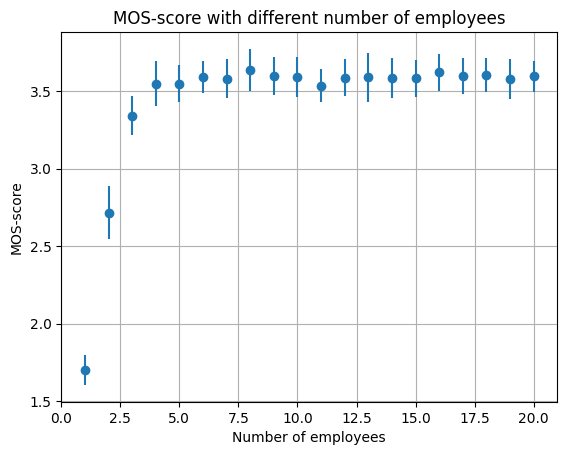

In [19]:
plt.errorbar(range(1, len(mean_vals)+1), list(mean_vals), yerr = list(std_vals), fmt="o")
plt.grid()
plt.xlabel("Number of employees")
plt.xlim(0,21)
plt.ylabel("MOS-score")
plt.title("MOS-score with different number of employees")
plt.savefig("../figures/Fig1.png")

Run 2

In [18]:
df = run()
mean_vals = df.mean(axis=0)
std_vals = df.std(axis=0)

c:\Users\super\Documents\3. semester komtek\Pålitelighet og ytelse med simulering\PYSE\scripts and notebooks\main.py:58: RuntimeWarning: invalid value encountered in long_scalars
  v = items_bought/shopping_list.sum()


KeyboardInterrupt: 

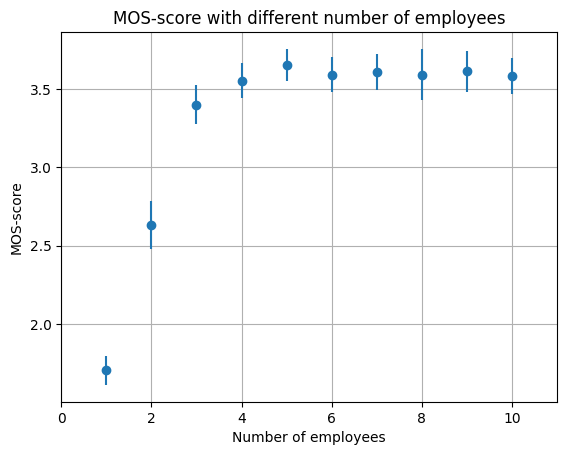

In [ ]:
plt.errorbar(range(1, len(mean_vals)+1), list(mean_vals), yerr = list(std_vals), fmt="o")
plt.grid()
plt.xlabel("Number of employees")
plt.xlim(0,11)
plt.ylabel("MOS-score")
plt.title("MOS-score with different number of employees")
plt.savefig("../figures/Fig2.png")